# Getting and showing most important feature from each text class

## Reading Data and making basic data manipulation

In [1]:
%%time
import pandas as pd
import numpy as np

########## Initing Constants and Variables ##########
TEXT_COL = 'Phrase'
AUX_CLASS_COL = 'new_sent'
class_col = 'Sentiment'


########## Reading Data ##########
df = pd.read_csv('sentiment-analysis-on-movie-reviews/train.tsv',sep='\t')

# Removing 'neutral' Analysis to improve separability in Negative and Positive Classes
df = df[df[class_col] != 2]
df = df[df[class_col] != 1]
df = df[df[class_col] != 3]

# Doing Sentment Became only 0 and 1 values
df['Sentiment'] = df['Sentiment']//4

CPU times: user 338 ms, sys: 366 ms, total: 704 ms
Wall time: 265 ms


## Basic Text dataprep

In [2]:
%%time
from data_prep import basic_preprocess_text

# Removing stopwords
df[TEXT_COL] = basic_preprocess_text(df[TEXT_COL], language='english')
# Removing Duplicates
df = df.drop_duplicates(subset=[TEXT_COL])
# Removing texts with less than 2 characteres
df = df[df['Phrase'].str.len()>2].reset_index(drop=True)
# Reseting Index
df.reset_index(drop=True,inplace=True)

/home/gerson/Develop/Projects/find_best_words_with_chi2/data_prep.py:26: FutureWarning: The default value of regex will change from True to False in a future version.
  text_series = text_series.str.replace(pat,'')
/home/gerson/Develop/Projects/find_best_words_with_chi2/data_prep.py:28: FutureWarning: The default value of regex will change from True to False in a future version.
  text_series = text_series.str.replace(r'\s+',' ')
/home/gerson/Develop/Projects/find_best_words_with_chi2/data_prep.py:31: FutureWarning: The default value of regex will change from True to False in a future version.
  text_series = text_series.str.replace('[^\w\s]','')
/home/gerson/Develop/Projects/find_best_words_with_chi2/data_prep.py:33: FutureWarning: The default value of regex will change from True to False in a future version.
  text_series = text_series.str.replace(' \d+','')


CPU times: user 738 ms, sys: 333 ms, total: 1.07 s
Wall time: 631 ms


## Plotting basic word cloud 

Doing 0 graph
Doing 1 graph


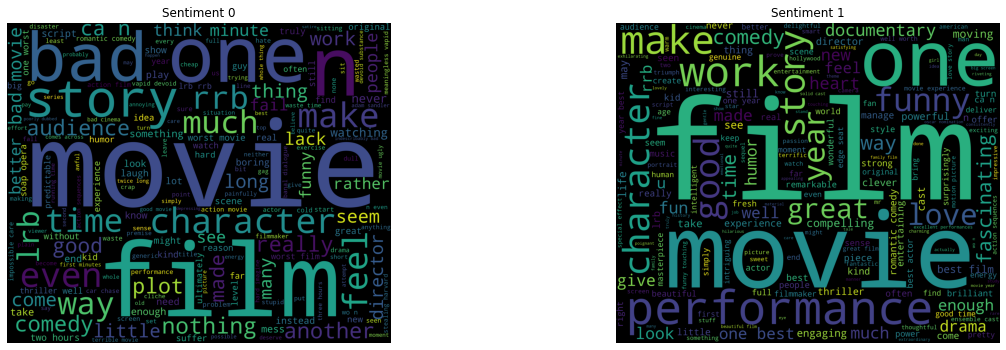

CPU times: user 23.4 s, sys: 877 ms, total: 24.3 s
Wall time: 24.5 s


In [3]:
%%time
from plot_word_cloud import plot_word_cloud
plot_word_cloud(df, TEXT_COL, class_col)

## Getting and Showing best features using Chi² only, Chi² * TFIDF and final Word Cloud

Negative


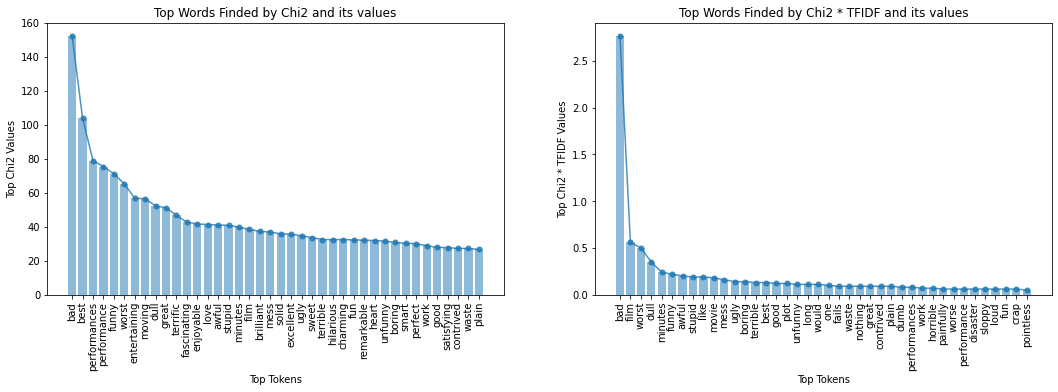

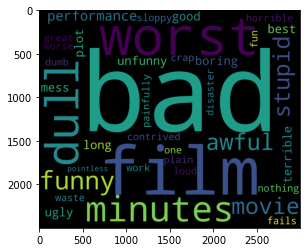

Positive


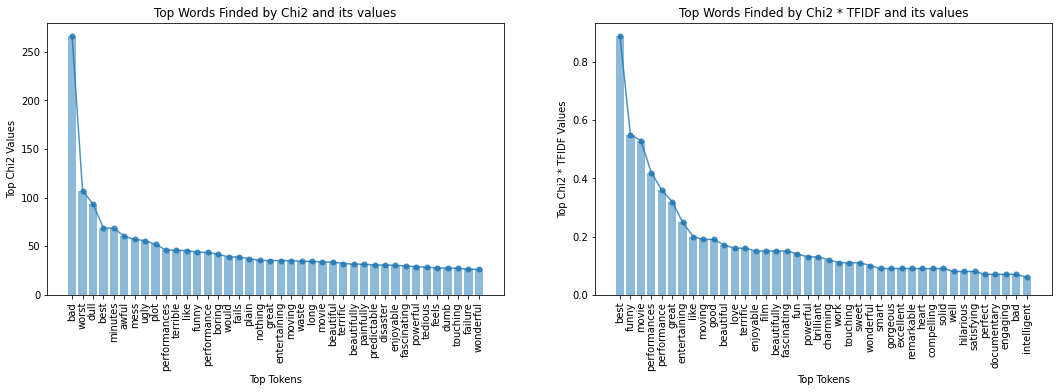

In [ ]:
%%time
from best_words_utils import get_main_words_pipeline
from plot_utils import plot_results

classes = [0,1]
dict_classes = {0:"Negative",1:"Positive"}

for c in dict_classes.keys():
    print(dict_classes[c])
    topchi2, result_chi2_freq = get_main_words_pipeline(df, TEXT_COL, class_col, c, ngram=(1,1), max_words=40)
    plot_results(topchi2, result_chi2_freq)